# KMeans Algorithm in Scratch

In [42]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1-x2)**2))

class KMeans:
    
    def __init__(self, K=3, max_iters=100, plot_steps=False):
        self.K = K
        self.max_iters = max_iters
        # list of sample indices for each cluster
        self.clusters = [[] for _ in range(self.K)]
        # mean feature vector for each cluster
        self.centroids = []
        self.plot_steps = plot_steps
    
    def predict(self, X):
        self.X = X
        self.n_samples, self.n_features = X.shape
        # initialize centroids
        random_sample_idxs = np.random.choice(self.n_samples, self.K, replace=False)
        self.centroids = [self.X[idx] for idx in random_sample_idxs]
        
        # optimization
        for _ in range(self.max_iters):
            # update clusters
            self.clusters = self._create_clusters(self.centroids)
            
            if self.plot_steps:
                self.plot()
            
            # update centroids
            centroids_old = self.centroids
            self.centroids = self._get_centroids(self.clusters)
            
            if self.plot_steps:
                self.plot()
            
            # check if converge
            if self._is_converged(centroids_old, self.centroids):
                break
            
        return self._get_cluster_labels(self.clusters)
            
    def _create_clusters(self, centroids):
        clusters = [[] for _ in range(self.K)]
        for idx, sample in enumerate(self.X):
            centroid_idx = self._closest_centroid(sample, centroids)
            clusters[centroid_idx].append(idx)
        return clusters
            
    def _closest_centroid(self, sample, centroids):
        distances = [euclidean_distance(sample, center) for center in centroids]
        closest_idx = np.argmin(distances)
        return closest_idx
    
    def _get_centroids(self, clusters):
        centroids = np.zeros([self.K, self.n_features])
        for cluster_idx, cluster in enumerate(clusters):
            centroids_mean = np.mean(self.X[cluster], axis=0)
            centroids[cluster_idx] = centroids_mean
        return centroids
    
    def _is_converged(self, centroids_old, centroids):
        distances = [euclidean_distance(centroids_old[i], centroids[i]) for i in range(self.K)]
        return np.sum(distances) == 0
    
    def _get_cluster_labels(self, clusters):
        labels = np.empty(self.n_samples)
        for cluster_idx, cluster in enumerate(clusters):
            for sample_idx in cluster:
                labels[sample_idx] = cluster_idx
        return labels
    
    def plot(self):
        fig, ax = plt.subplots(figsize=(5,3))
        for cluster_idx, cluster in enumerate(self.clusters):
            point = self.X[cluster].T
            ax.scatter(*point)
        for point in self.centroids:
            ax.scatter(*point, marker="*", color="black")

0.311


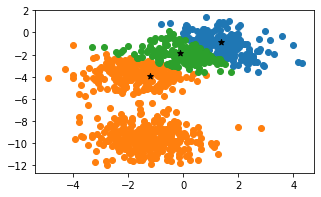

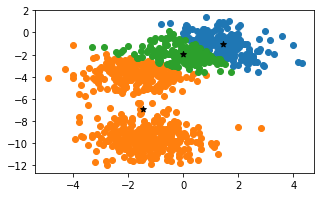

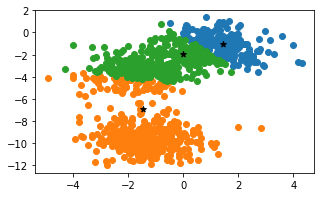

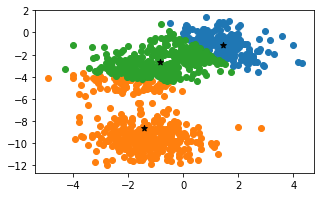

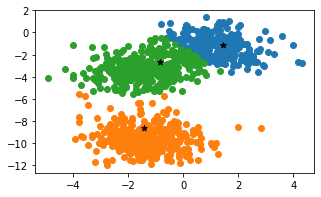

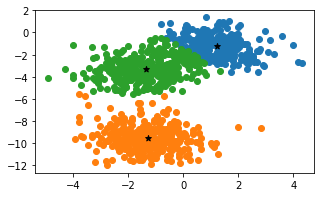

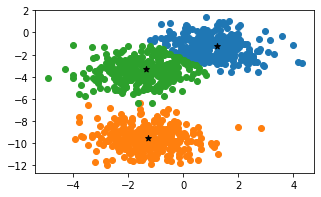

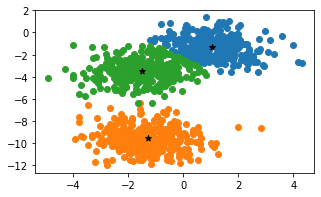

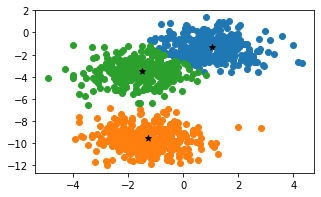

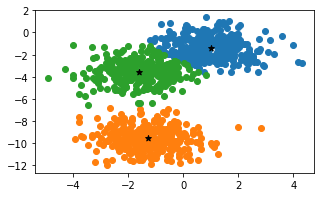

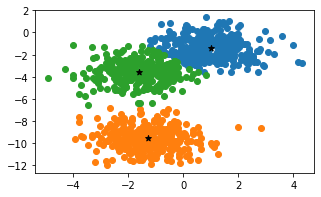

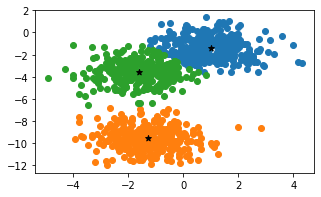

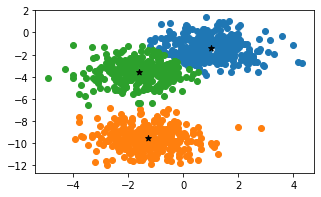

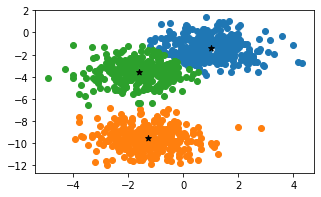

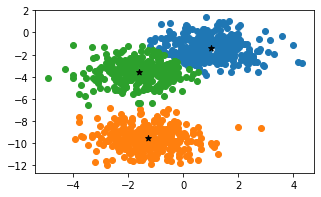

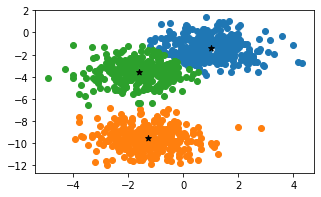

In [58]:
# test

from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score

X, y = make_blobs(n_samples=1000, centers=3, n_features=2, random_state=2)

kmeans = KMeans(plot_steps=True)
y_labels = kmeans.predict(X)

acc = accuracy_score(y, y_labels)
print(acc) # low accuracy score : limit of KMeans Algoritm...

# Feedback

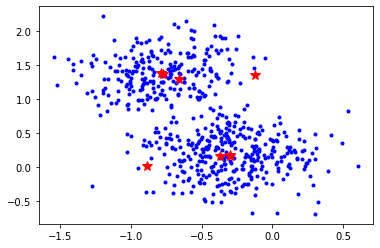

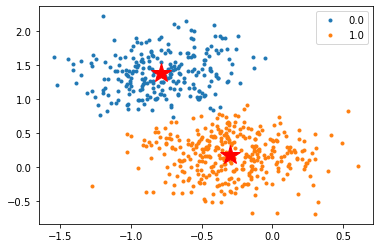

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.close("all")

dfLoad = pd.read_csv("https://raw.githubusercontent.com/hanwoolJeong/lectureUniv/main/ClassificationSample.txt", sep="\s+")

samples = np.array(dfLoad)
x = np.array(dfLoad["X"])
y = np.array(dfLoad["Y"])
N = len(x)
numK = 2

f1 = plt.figure(1)
ax1 = f1.add_subplot(111)
ax1.plot(x,y,"b.")

#k-means clustering
[mx, sx] = [np.mean(x), np.std(x)]
[my, sy] = [np.mean(y), np.std(y)]
z0 = np.array([mx+sx, my+sy]).reshape(1,2)
z1 = np.array([mx-sx, my-sy]).reshape(1,2)
Z = np.r_[z0,z1] #initialize: try to avoid too irrelevant or odd value

k = np.zeros(N) #clustering: K = 0,1
while True:
    # divide and conquer -> use function to plot
    ax1.plot(Z[:,0], Z[:,1], "r*", markersize="10")
    kOld = np.copy(k)
    for i in range(N):
        # divide and conquer -> use function to calculate distance
        distance_z0 = np.linalg.norm(samples[i,:] - Z[0,:])
        distance_z1 = np.linalg.norm(samples[i,:] - Z[1,:])
        # divide and conquer -> use function to make label
        k[i] = distance_z0 > distance_z1 #python logic
        
    # divide and conquer -> use function if k is converged
    if np.all(np.equal(kOld,k)):
        break
    
    dfCluster = pd.DataFrame(np.c_[x,y,k])
    dfCluster.columns = ["X", "Y", "K"]
    dfGroup = dfCluster.groupby("K")
    for cluster in range(numK):
        Z[cluster, :] = dfGroup.mean().iloc[cluster]

f2 = plt.figure(2)
ax2 = f2.add_subplot(111)
for (k_val, clustered) in dfGroup:
        ax2.plot(clustered["X"], clustered["Y"], ".", label=k_val)
ax2.plot(Z[:,0], Z[:,1], "r*", markersize="20")
ax2.legend()
plt.show()